# datathon (IBM) 19-Oct-2024
## treetastic

Helps to decide where to plant trees in cities and parks based on one
or more images.

### purpose

- Noise reduction
- Air quality
- Aesthetics
- Mental health
- Community space

### workflow

1. Image (geotagged) and budget provided
    - Images should look down the middle of street
2. Images passed through API to Python function
3. Images analysed and determines list of ideal pixels for new trees
    - Assigned with score for improvement to area
4. Program iteratively decides which trees are best for an area
5. List of trees and images are returned to the interface

### tech stack

- Python (interacting with AI)
    - OpenCV for image analysis

### Task 1: Image analysis
Using the OpenCV library

In [4]:
from os import listdir
from os.path import isfile, join
import cv2
import matplotlib.pyplot as plt

# find the files
local_path = "/Users/jayambadkar/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Personal/Datathon/Photos"
getPhotoNames = [f for f in listdir(local_path) if isfile(join(local_path, f))]


In [11]:

# read images as greyscale with library and store in a list
images = [cv2.imread(join(local_path, im_path), cv2.IMREAD_GRAYSCALE) for im_path in getPhotoNames]

image_paths = [join(local_path, pp) for pp in getPhotoNames]


In [7]:
pb_file = "frozen_inference_graph.pb"
pbtxt_file = "deeplabv3_mnv2_pascal_trainval.pbtxt"


In [13]:
# Load the model

import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
model.eval()

Using cache found in /Users/jayambadkar/.cache/torch/hub/pytorch_vision_v0.10.0


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [14]:
from PIL import Image
from torchvision import transforms

filename = image_paths[0]

input_image = Image.open(filename)
input_image = input_image.convert("RGB")
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)


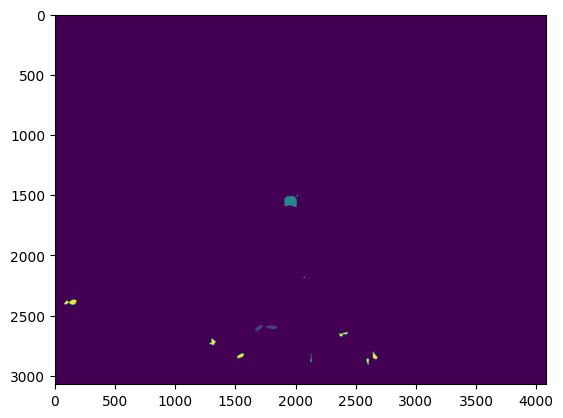

In [15]:
plt.imshow(output_predictions.cpu().numpy())
plt.show()